        Date     Product  Quantity   Price    Sales
0 2024-05-15      Tablet         4  955.40  3821.60
1 2024-05-14      Tablet         1  679.94   679.94
2 2024-02-11  Headphones         1  472.58   472.58
3 2024-04-03      Tablet         2  711.49  1422.98
4 2024-04-27      Tablet         3  777.12  2331.36
Shape: (50, 5)

Data types: 
 Date        datetime64[ns]
Product             object
Quantity             int64
Price              float64
Sales              float64
dtype: object

Missing values: 
 Date        0
Product     0
Quantity    0
Price       0
Sales       0
dtype: int64

Total Sales: 89411.34000000001

Sales by Product:
 Product
Laptop        25610.30
Tablet        20933.10
Headphones    19112.85
Smartwatch    17912.62
Phone          5842.47
Name: Sales, dtype: float64


C:\Users\durbe\AppData\Local\Temp\ipykernel_16280\1714004544.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="Blues_d")


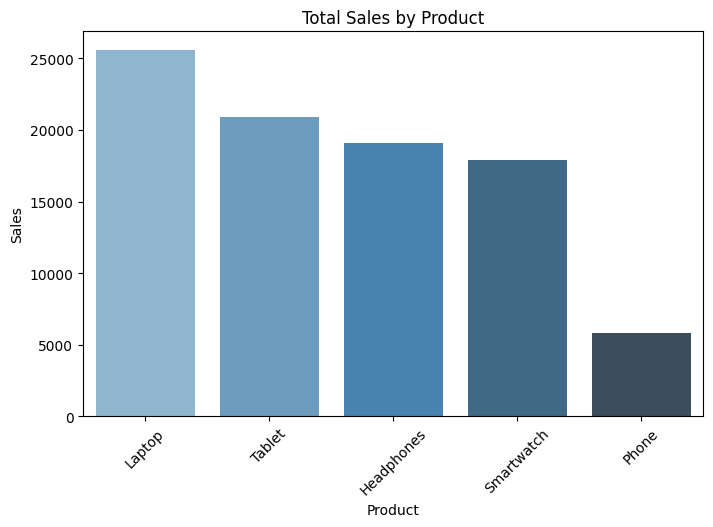

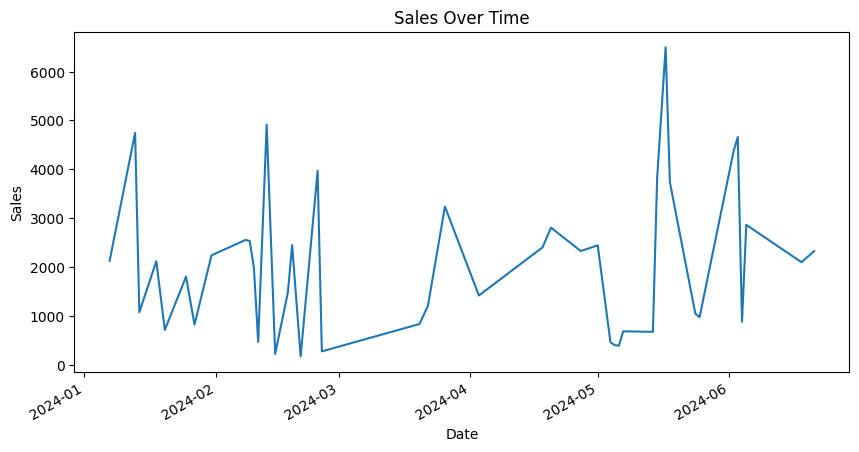

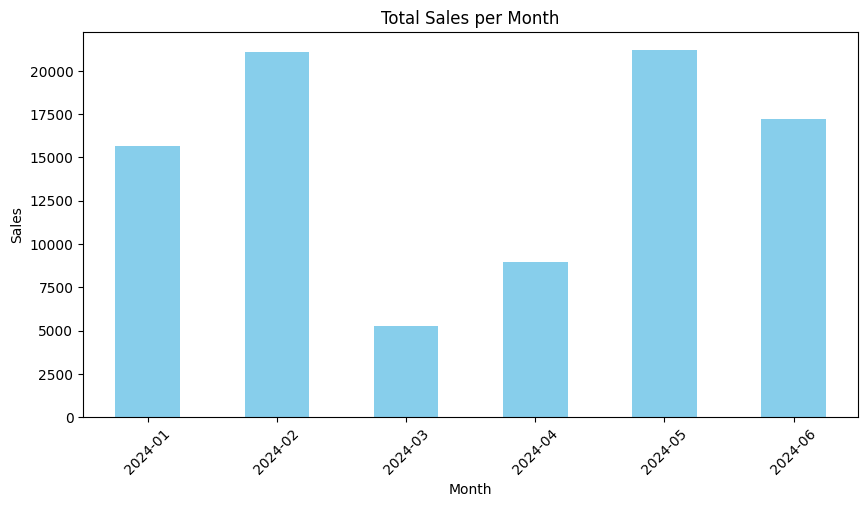

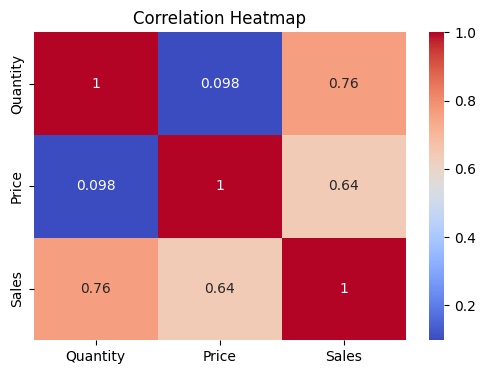


=== SUMMARY ===
✅ Total Sales: 89411.34000000001
✅ Best Selling Product: Laptop with 25610.3 in sales
✅ Best Month: 2024-05 with 21177.96 in sales


In [6]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load cleaned dataset
df = pd.read_csv("../data/processed/sales_data_clean.csv")

# 3. Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 4. Preview data
print(df.head())
print("Shape:", df.shape)
print("\nData types: \n", df.dtypes)
print("\nMissing values: \n", df.isnull().sum())

# 5. Basic KPIs
total_sales = df['Sales'].sum()
sales_by_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales:", total_sales)
print("\nSales by Product:\n", sales_by_product)

# 6. Sales by product (bar chart)
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Total Sales by Product")
plt.ylabel("Sales")
plt.show()

# 7. Sales over time (line chart)
plt.figure(figsize=(10,5))
df.groupby('Date')['Sales'].sum().plot()
plt.title("Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

# 8. Monthly sales
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales per Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


# 9. Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 10. Summary
print("\n=== SUMMARY ===")
print(f"✅ Total Sales: {total_sales}")
print(f"✅ Best Selling Product: {sales_by_product.idxmax()} with {sales_by_product.max()} in sales")
print(f"✅ Best Month: {monthly_sales.idxmax()} with {monthly_sales.max()} in sales")
